# Medical Image Classification

In this little project I am going to use an exercise I had during my studies at KIT as a domain to explore different methods of Transfer Learning and model architectures using PyTorch.

## Data Loading & Analysis

In [23]:
import os
import matplotlib.pyplot as plt
from PIL import Image

from torch.utils.data import Dataset, DataLoader

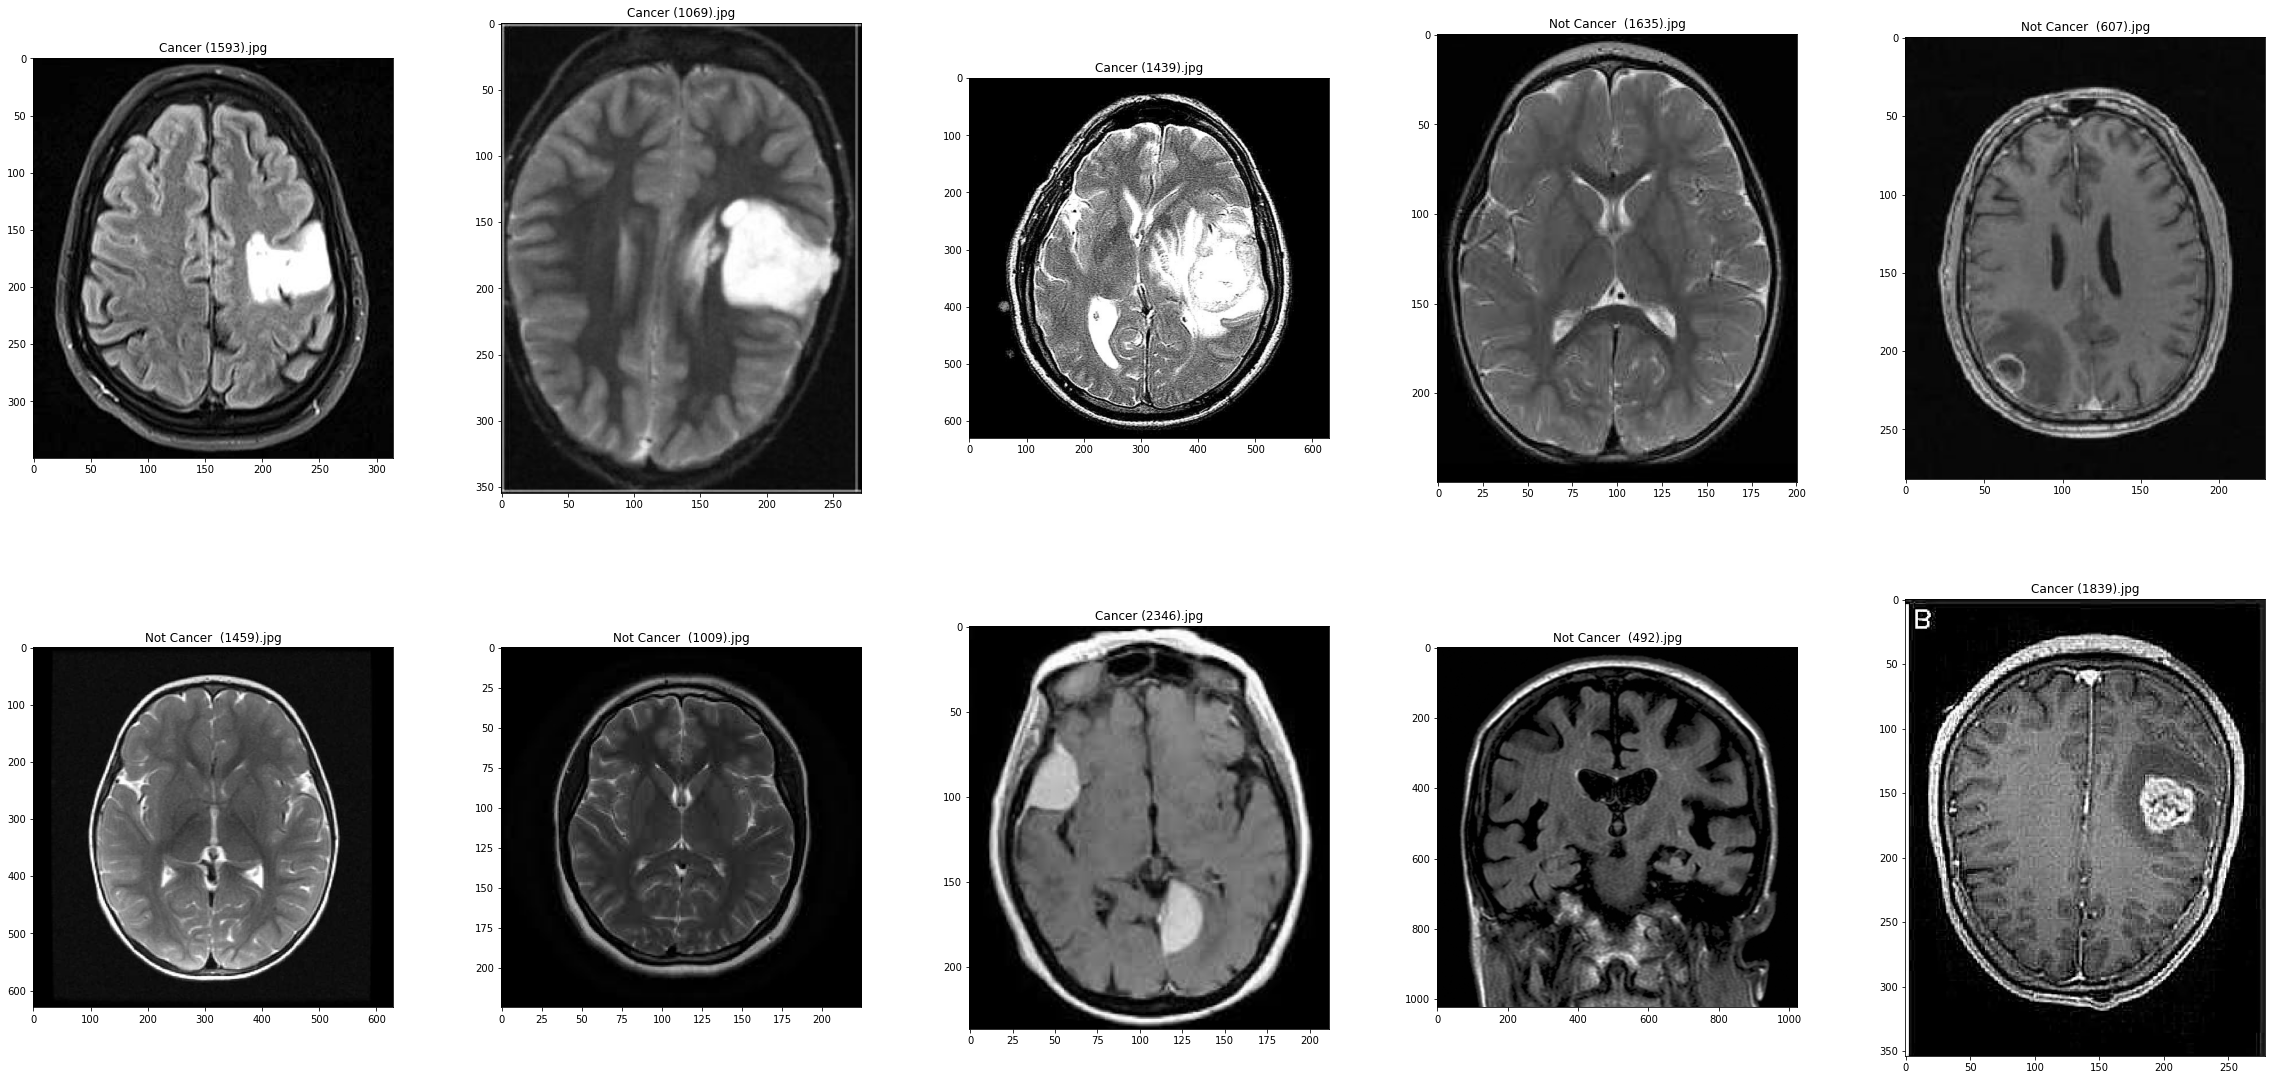

In [19]:
img_dir = './dataset' # path of image directory
images = os.listdir(img_dir)

# plot 10 x-ray images
fig, axes = plt.subplots(2, 5, figsize=(40,20), gridspec_kw=dict(hspace=0.1, wspace=0.3))
for i, ax in enumerate(axes.flat):
    ax.imshow(Image.open(os.path.join(img_dir, images[i])))
    ax.set_title(images[i])

In [20]:
# implement tumor_df as pd.DataFrame for train/test split and further data process
img_names = [] # [] # list contains image name
img_labels = [] # list contains labels (0 as not cancer, 1 as cancer)
tumor_df = None
for i in images:
    img_names.append(i)
    img_labels.append(0 if 'Not Cancer' in i else 1)

# YOUR CODE HERE
tumor_df = pd.DataFrame()
tumor_df["name"] = pd.Series(img_names)
tumor_df["label"] = pd.Series(img_labels)

In [24]:
class TumorImageDataset(Dataset):
    """load, transform and return image and label"""
    def __init__(self, annotations_df, img_dir, transform=None):
        self.img_labels=annotations_df
        self.img_dir = img_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        # get image path according to idx
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        # convert all image to RGB format
        image = Image.open(img_path).convert('RGB')
        label = self.img_labels.iloc[idx, 1]
        # apply image transform
        if self.transform:
            image = self.transform(image)
        return [image, label]